# Error Probabilities of linearer Modulation Schemes

## Table of Contents

* [MAP and ML Detection](#MAP+ML-Detection)
* [Symbol Error Probabilities](#SymbolErrorProbabilities)
* [Symbol Error Probabilities versus Energy Efficiency](#EnergyEfficiency)
* [Bit Error Probabilities](#BitErrorProbabilities)


## MAP- und ML-Detektion <a class="anchor" id="MAP+ML-Detection"></a>

After the matched filtering and sampling  Abtastung, the receiver has to perform the data detection. For this, different criteria can be used. In the following derivation, we assume that no intersymbol interference occurs, i.e. the 1. Nyquist criterion is fulfilled. Only additive white Gaussian noise (AWGN) disturbs the transmission. The received symbol can be expressed as

\begin{equation}
    y = x + n \; .
\end{equation}

The Maximum A Posteriori (MAP) detector maximizes the a posteori probability (APP) $\Pr\{ \tilde{x} \mid y \}$. Using the rule of Bayes, the APP can be transformed to

\begin{equation}
    \Pr\{ \tilde{x} \mid y \} = p(y \mid \tilde{x}) \cdot \frac{\Pr\{ \tilde{x}\}}{p(y)} 
\end{equation}

and the MAP detector becomes

\begin{equation}
    \hat{x}^{\mathsf{MAP}}
    = \arg \! \max_{\tilde{x} \in \mathbb{X}} \Pr\{ \tilde{x} \mid y \}
    = \arg \! \max_{\tilde{x} \in \mathbb{X}} \Big[ p(y \mid \tilde{x}) \cdot \Pr\{ \tilde{x}\} \Big] \; .
\end{equation}

It can be seen that both, the likelihood function $p(y \mid \tilde{x})$ as well as the a priori distribution $\Pr\{ \tilde{x}\}$ influence the detection. The MAP detector balances the significance of the observation $y$ and the prior knowledge in an optimal way and determines the most probable symbol based on both distributions.

If all data symbols occur with identical probabilities, the term $\Pr\{ \tilde{x}\}$ becomes a constant and can be dropped. With this simplification, we obtain the maximum likelihood (ML) detector

\begin{equation}
    \hat{x}^{\mathsf{ML}} = \arg \! \max_{\tilde{x} \in \mathbb{X}} p(y \mid \tilde{x}) \; .
\end{equation}

The likelihood function is defined as the conditional probability density of $y$ given the hypothesis $\tilde{x}$ and represents the noise statistics for $\tilde{x}=x$.

For the case of an AWGN channel, the expression of MAP and ML detection can be further specified. Without loss of generality, the natural logarithm can be applied  because it is a monotonically increasing function and does not change the position of the maximum. We obtain the expressions

\begin{align*}
    \hat{x}^{\mathsf{MAP}}
    &= \arg \! \max_{\tilde{x} \in \mathbb{X}} 
        \Big[ \log p(y \mid \tilde{x}) + \log \Pr\{ \tilde{x}\} \Big]
     = \arg \! \max_{\tilde{x} \in \mathbb{X}} 
        \Big[- \frac{|y - \tilde{x}|^2}{\sigma_{\cal N}^2} 
         + \log \Pr\{ \tilde{x}\} \Big] \\
     &= \arg \! \min_{\tilde{x} \in \mathbb{X}} 
        \Big[|y - \tilde{x}|^2 -\sigma_{\cal N}^2 \cdot \log \Pr\{ \tilde{x}\} \Big] \\
    \hat{x}^{\mathsf{ML}} 
    &= \arg \! \max_{\tilde{x} \in \mathbb{X}} \log p(y \mid \tilde{x})
     = \arg \! \min_{\tilde{x} \in \mathbb{X}} |y - \tilde{x}|^2 \; .
\end{align*}

For Gaussian noise, the ML detector searches for the data symbol $\tilde{x} \in \mathbb{X}$ having the smallest squared Euclian distance to the received value $y$. The MAP detector biases this distance by the a priori probabilities of each hypothesis$ \tilde{x}$. For very strong noise, the variance $\sigma_{\cal N}^2$ is large and dominates the decision because the received value $y$ is very unreliable. At high SNR (small $\sigma_{\cal N}^2$), the received value $y$ dominates the decision since it is now very trustful.


## Symbol Error Probabilities <a class="anchor" id="SymbolErrorProbabilities"></a>

A detection error occurs if the detector decides in favor of a symbol $\hat{x} \neq x$ that has not been transmitted. This happens when the wrong symbol $\tilde{x}$ is closer to $y$ than the correct symbol $x$.

One can define a decision or Voronoi region for each symbol $x \in \mathbb{X}$ such that all elements of a particular region have Euclidean distance to the associated hypothesis being smaller than to any other data symbol. Therefore, an error occurs if the received value $y$ lies in the wrong Voronoi region, i.e. it has exceeded the decision threshold of the true region. The Voronoi regions for a 16 QAM are illustrated in the diagram below.

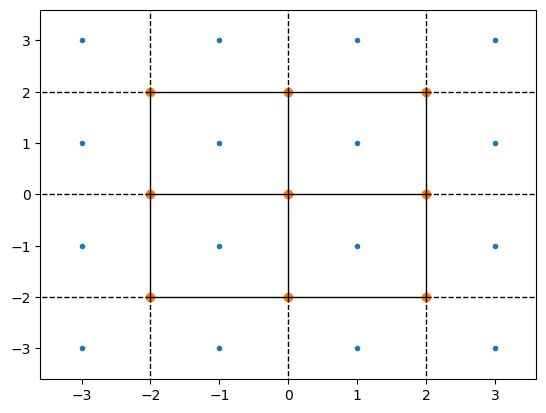

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

qam = np.array([[-3,-3],[-3,-1],[-3,1],[-3,3],[-1,-3],[-1,-1],[-1,1],[-1,3],[1,-3],[1,-1],[1,1],[1,3],[3,-3],[3,-1],[3,1],[3,3]])

vor = Voronoi(qam)

fig1 = voronoi_plot_2d(vor)
plt.show()


The probablity of an error event depends on the particular modulation scheme. Its computation requires the integration of the likelihood function over a certain interval. For Gausian noise, this integral does not have a closed-form solution. However, it can be numerically computed leading to the well-known error fuction or the complementary error function. The have the form

\begin{align*}
    \mathrm{erf}(x) &= \frac{2}{\sqrt{\pi}} \cdot \int_0^x e^{- \xi^2} \ d\xi \\
    \mathrm{erfc}(x) &= 1 - \mathrm{erf}(x)
    = \frac{2}{\sqrt{\pi}} \cdot \int_x^{\infty} e^{- \xi^2} \ d\xi 
\end{align*}

and are depicted in the diagram below.

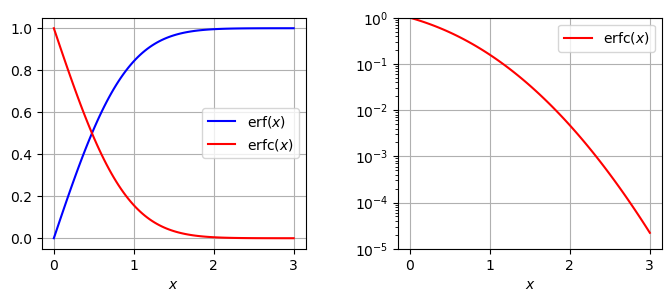

In [16]:
from scipy.special import erf, erfc

x = np.linspace(0,3,101)
ferf = erf(x)
ferfc = erfc(x)

fig2 = plt.figure(figsize=(8,3))
plt.subplots_adjust(wspace=0.35)

ax1 = fig2.add_subplot(121)
ax1.plot(x, ferf, 'b-',label='$\\mathrm{erf}(x)$')
ax1.plot(x, ferfc, 'r-',label='$\\mathrm{erfc}(x)$')
plt.xlabel('$x$')
plt.grid(True)
plt.legend()

ax2 = fig2.add_subplot(122)
ax2.semilogy(x, ferfc, 'r-',label='$\\mathrm{erfc}(x)$')
plt.xlabel('$x$')
plt.ylim(1e-5,1)
plt.grid(True)
plt.legend()

With these functions, expressions for the error probabilities of linear modulation schemes can be derived. Thereby, the smallest squared Euclidean distance 

\begin{equation}
    \Delta_0^2 = \min_{x,\tilde{x} \in \mathbb{X} \atop x \neq \tilde{x}} \frac{|x - \tilde{x}|^2}{\sigma_{\cal X}^2}
\end{equation}

normalized to the average signal power plays an important role. It is a specific parameter of the modulation alphabet. The following equations summarize basic results for different modulation schemes.

\begin{align*}
    P_{\mathrm{s}}^{M-\mathsf{ASK}} 
    &= \frac{M-1}{M} \cdot \mathrm{erfc} \left( \sqrt{ \frac{3}{M^2-1} \frac{E_{\mathrm{s}}}{N_0} } \right)
     = \frac{M-1}{M} \cdot \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 \frac{E_{\mathrm{s}}}{N_0} } \right) \\
    P_{\mathrm{s}}^{M-\mathsf{QAM}} 
    &\approx 2 \frac{\sqrt{M}-1}{\sqrt{M}} \cdot \mathrm{erfc} \left( \sqrt{ \frac{3}{2(M-1)} \frac{E_{\mathrm{s}}}{N_0} } \right) 
    = 2 \frac{\sqrt{M}-1}{\sqrt{M}} \cdot \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 \frac{E_{\mathrm{s}}}{N_0} } \right) \\
    P_{\mathrm{s}}^{M-\mathsf{PSK}} 
    &\approx \mathrm{erfc} \left( \sqrt{ \sin^2 \left( \frac{\pi}{M} \right) \frac{E_{\mathrm{s}}}{N_0} } \right)
     = \mathrm{erfc} \left( \sqrt{ \left( \frac{\Delta_0}{2} \right)^2 \frac{E_{\mathrm{s}}}{N_0} } \right)
\end{align*}

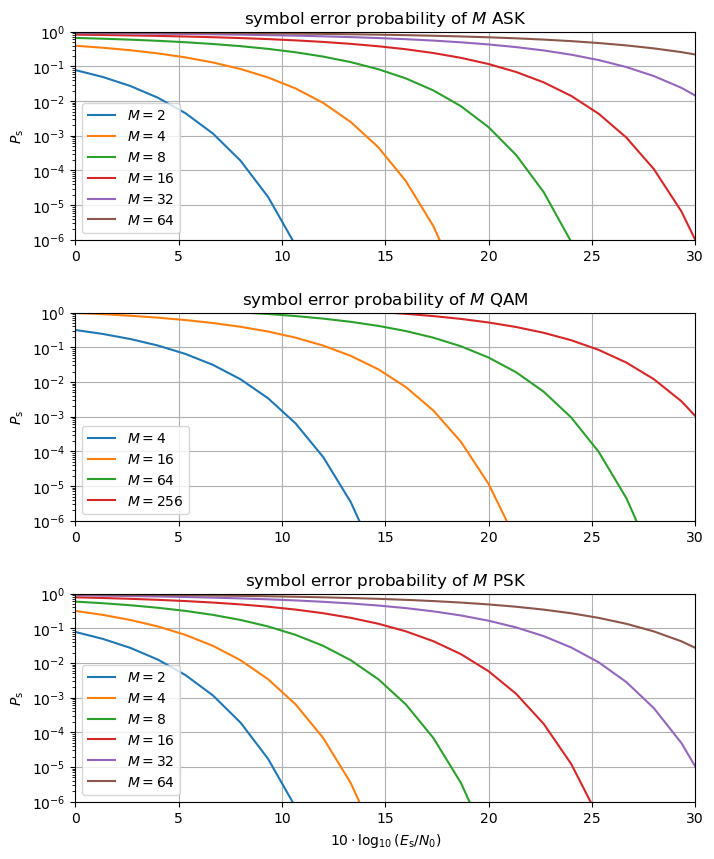

In [19]:
# definiton of signal to noise ratio
SNRdB = np.linspace(0,40,31)
SNR = 10**(SNRdB/10)

# symbol error rates (SER) of ASK
M_ASK = np.array([2,4,8,16,32,64])
m_ASK = np.log2(M_ASK)
Mv,SNRv = np.meshgrid(M_ASK,SNR)
SER_ASK = (Mv-1)/Mv * erfc(np.sqrt(3.0/(Mv**2-1) * SNRv))

# symbol error rates (SER) of QAM
M_QAM = np.array([4,16,64,256])
m_QAM = np.log2(M_QAM)
Mv,SNRv = np.meshgrid(M_QAM,SNR)
SER_QAM = 2*(np.sqrt(Mv)-1)/np.sqrt(Mv) * erfc(np.sqrt(3.0/(2*(Mv-1)) * SNRv))

# symbol error rates (SER) of PSK
M_PSK = np.array([2,4,8,16,32,64])
m_PSK = np.log2(M_PSK)
SER_PSK = erfc(np.sqrt(np.outer(SNR,np.sin(np.pi/M_PSK)**2)))
# exact solution for M=2 (BPSK)
SER_PSK[:,0] = SER_PSK[:,0] / 2.0

fig3 = plt.figure(figsize=(8,10))
plt.subplots_adjust(hspace=0.35)

ax3 = fig3.add_subplot(311)
cntr = 0
for run in M_ASK:
    ax3.semilogy(SNRdB, SER_ASK[:,cntr], '-',label='$M=$%g' %(run))
    cntr += 1
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probability of $M$ ASK')
plt.legend()

ax4 = fig3.add_subplot(312)
cntr = 0
for run in M_QAM:
    ax4.semilogy(SNRdB, SER_QAM[:,cntr], '-',label='$M=$%g' %(run))
    cntr += 1
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probability of $M$ QAM')
plt.legend()

ax5 = fig3.add_subplot(313)
cntr = 0
for run in M_PSK:
    ax5.semilogy(SNRdB, SER_PSK[:,cntr], '-',label='$M=$%g' %(run))
    cntr += 1
plt.xlabel('$10 \\cdot \\log_{10}(E_{\\mathrm{s}}/N_0)$')
plt.ylabel('$P_{\\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probability of $M$ PSK')
plt.legend()

## Symbol Error Probabilities versus Energy Efficiency <a class="anchor" id="EnergyEfficiency"></a>

A fair comparison between different modulation schemes can be achieved by considering the average energy per information bit $E_{\mathrm{b}}$ instead of the averange energy per symbol $E_{\mathrm{s}}$. They are related to each other by $E_{\mathrm{s}}=m \cdot E_{\mathrm{b}}$, with $m$ denoting the number of information bits per symbol. The required ration $E_{\mathrm{b}}/N_0$ for achieving a certain error probability is often denoted as the energy efficiency. We obtain the error rate curves shown in the diagrams below. This kind of representation is very interesting from an information theoretic point of view. It does not consider the physically measurable SNR, but the energy spent per information bit related to the power spectral density of the noise. Compared to the expression with $E_{\mathrm{s}}/N_0$, the curves are horizontally shifted by $10 \log_{10} m$.

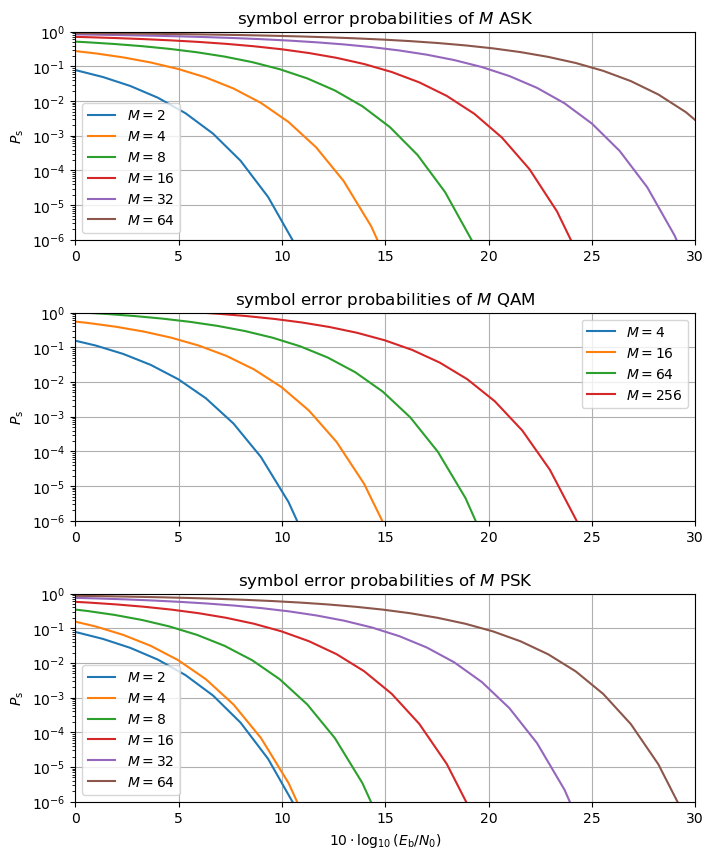

In [25]:
fig4 = plt.figure(figsize=(8,10))
plt.subplots_adjust(hspace=0.35)

ax3 = fig4.add_subplot(311)
cntr = 0
for run in M_ASK:
    ax3.semilogy(SNRdB-10*np.log10(m_ASK[cntr]), SER_ASK[:,cntr], '-',label='$M=$%g' %(run))
    cntr += 1
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probabilities of $M$ ASK')
plt.legend()

ax4 = fig4.add_subplot(312)
cntr = 0
for run in M_QAM:
    ax4.semilogy(SNRdB-10*np.log10(m_QAM[cntr]), SER_QAM[:,cntr], '-',label='$M=$%g' %(run))
    cntr += 1
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probabilities of $M$ QAM')
plt.legend()

ax5 = fig4.add_subplot(313)
cntr = 0
for run in M_PSK:
    ax5.semilogy(SNRdB-10*np.log10(m_PSK[cntr]), SER_PSK[:,cntr], '-',label='$M=$%g' %(run))
    cntr += 1
plt.xlabel('$10 \\cdot \\log_{10}(E_{\\mathrm{b}}/N_0)$')
plt.ylabel('$P_{\\mathrm{s}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('symbol error probabilities of $M$ PSK')
plt.legend()

## Bit Error Probabilities <a class="anchor" id="BitErrorProbabilties"></a>

Bei Gray-Codierung unterscheiden sich benachbarte Symbole nur durch 1 Bit in ihrer binären Darstellung. Da Fehler am häufigsten durch das Vertauschen benachbarter Symbole entstehen, wird bei diesen Fehlerereignissen nur eines von $m$ Bit verfälscht. Damit gilt für die Bitfehlerwahrscheinlichkeit näherungsweise

\begin{equation}
    P_{\mathrm{b}} \approx \frac{P_{\mathrm{s}}}{m} \; .
\end{equation}

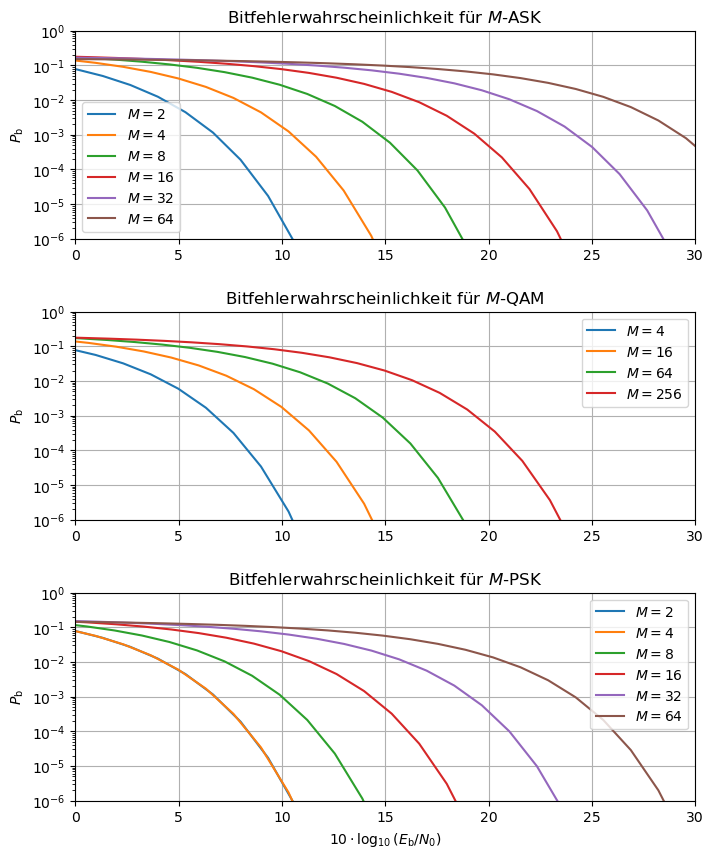

In [26]:
BER_ASK = SER_ASK / np.tile(m_ASK,(len(SNRdB),1))
BER_QAM = SER_QAM / np.tile(m_QAM,(len(SNRdB),1))
BER_PSK = SER_PSK / np.tile(m_PSK,(len(SNRdB),1))

fig5 = plt.figure(figsize=(8,10))
plt.subplots_adjust(hspace=0.35)

ax6 = fig5.add_subplot(311)
cntr = 0
for run in M_ASK:
    ax6.semilogy(SNRdB-10*np.log10(m_ASK[cntr]), BER_ASK[:,cntr], '-',label='$M=$%g' %(run))
    cntr += 1
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\\mathrm{b}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('Bitfehlerwahrscheinlichkeit für $M$-ASK')
plt.legend()

ax7 = fig5.add_subplot(312)
cntr = 0
for run in M_QAM:
    ax7.semilogy(SNRdB-10*np.log10(m_QAM[cntr]), BER_QAM[:,cntr], '-',label='$M=$%g' %(run))
    cntr += 1
#plt.xlabel('SNR in dB')
plt.ylabel('$P_{\\mathrm{b}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('Bitfehlerwahrscheinlichkeit für $M$-QAM')
plt.legend()

ax8 = fig5.add_subplot(313)
cntr = 0
for run in M_PSK:
    ax8.semilogy(SNRdB-10*np.log10(m_PSK[cntr]), BER_PSK[:,cntr], '-',label='$M=$%g' %(run))
    cntr += 1
plt.xlabel('$10 \\cdot \\log_{10}(E_{\\mathrm{b}}/N_0)$')
plt.ylabel('$P_{\\mathrm{b}}$')
plt.xlim(0,30)
plt.ylim(1e-6,1)
plt.grid(True)
plt.title('Bitfehlerwahrscheinlichkeit für $M$-PSK')
plt.legend()